<a href="https://colab.research.google.com/github/Valmik2004/Infosys-Springboard-Internship/blob/main/Day_5_Tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving fake_job_postings.csv to fake_job_postings.csv


                       Model  Accuracy  Precision    Recall  F1-score
0        Logistic Regression  0.965604   0.980769  0.294798  0.453333
1   Decision Tree (depth=20)  0.966163   0.732143  0.473988  0.575439
2  Random Forest (100 trees)  0.980705   0.990566  0.606936  0.752688


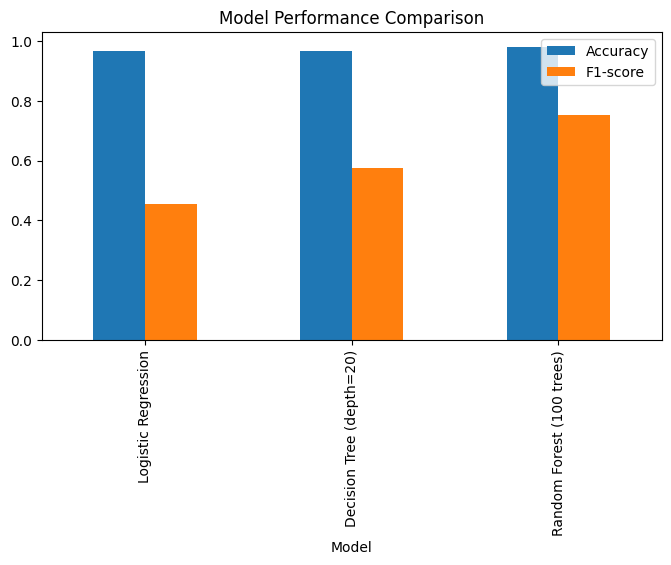

In [2]:
# Task 1 – Model Comparison
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("fake_job_postings.csv")
df = df.dropna(subset=['description'])

# TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['description'])
y = df['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Model setups
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree (depth=20)": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest (100 trees)": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Evaluate all
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    })

# Results DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Plot comparison
results_df.set_index("Model")[["Accuracy", "F1-score"]].plot(kind='bar', figsize=(8,4), title="Model Performance Comparison")
plt.show()


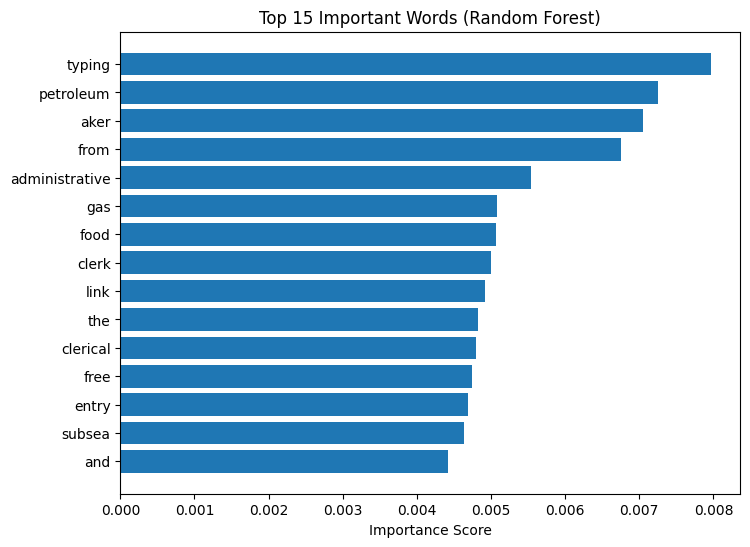

In [3]:
# Task 2 – Feature Importance Analysis
import numpy as np
import matplotlib.pyplot as plt

# Use trained Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[-15:][::-1]
feature_names = vectorizer.get_feature_names_out()

plt.figure(figsize=(8,6))
plt.barh(range(15), importances[indices][::-1], align='center')
plt.yticks(range(15), [feature_names[i] for i in indices][::-1])
plt.title("Top 15 Important Words (Random Forest)")
plt.xlabel("Importance Score")
plt.show()
